In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset"
CATEGORIES = ["brick", "notbrick"]

In [3]:
#retrieving image files, in case they are needed later
brick_path = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset/brick"
notbrick_path = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset/notbrick"
brick_img_files = os.listdir(brick_path)
notbrick_img_files = os.listdir(notbrick_path)

# for f in files:
#     print(f)

import pandas as pd
brick_df = pd.DataFrame({
    'brick_img_files': brick_img_files,
    'category': 1
})

In [4]:
notbrick_df = pd.DataFrame({
    'notbrick_img_files': notbrick_img_files,
    'category': 0
})

In [5]:
print(len(brick_df))
brick_df.head()

749


,brick_img_files,category
0,0-New-Construction-Real-Estate-For-Sale-O27Fal...,1
1,0-New-Construction-Real-Estate-For-Sale-O27Fal...,1
2,00775a774672dddc5f859ec4169ccfc5l-m2503259883o...,1
3,01_15BarringtonHillsRd_575_FrontView_HiRes-114...,1
4,02092012103016_ritz-craft-advantages-ext.jpg,1


In [6]:
print(len(notbrick_df))
notbrick_df.head()

766


,notbrick_img_files,category
0,001_Toll_8_21_17_1920.jpg,0
1,016a5535.jpg,0
2,02Home102-768x432.jpg,0
3,04.jpg,0
4,049-209Victorian-lowRES20copy_crp.jpg,0


In [7]:
#stack dataframes vertically
#randomize based on category column
vertical_stack = pd.concat([brick_df, notbrick_df], axis=0)
print(len(vertical_stack))

1515


In [8]:
all_dfs = [brick_df, notbrick_df]

# Give all df's common column names
for df in all_dfs:
    df.columns = ['img_files', 'category']

combined_df = pd.concat(all_dfs).reset_index(drop=True)

In [9]:
len(combined_df)

1515

In [10]:
combined_df.head(1600)

,img_files,category
0,0-New-Construction-Real-Estate-For-Sale-O27Fal...,1
1,0-New-Construction-Real-Estate-For-Sale-O27Fal...,1
2,00775a774672dddc5f859ec4169ccfc5l-m2503259883o...,1
3,01_15BarringtonHillsRd_575_FrontView_HiRes-114...,1
4,02092012103016_ritz-craft-advantages-ext.jpg,1
...,...,...
1510,water-dwellings-from-water-FLOATINGHOUSES0520.jpg,0
1511,What-Are-The-Different-Types-Of-Stucco.jpg,0
1512,what-is-stucco-made-of.jpg,0
1513,white-stucco-that-needs-repair.jpg,0


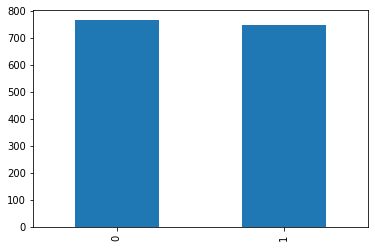

In [11]:
combined_df['category'].value_counts().plot.bar()

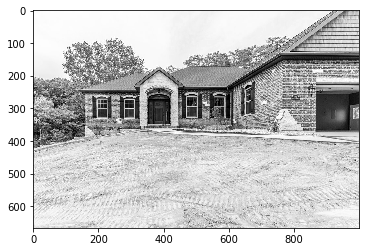

In [12]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [13]:
print(img_array)

[[250 250 250 ... 199 201 207]
 [251 251 251 ... 207 209 215]
 [251 251 251 ... 153 158 165]
 ...
 [227 232 235 ... 243 243 242]
 [220 223 225 ... 247 248 248]
 [220 219 221 ... 247 249 249]]


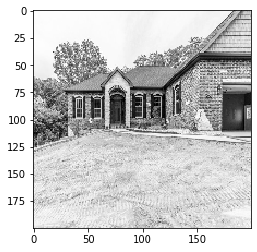

In [14]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [16]:
print(len(training_data))

1513


In [17]:
import random

random.shuffle(training_data)

In [18]:
#sample at index 1 is label
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
0
1
0


In [19]:
#training_data[:15]

In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [22]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in_X = open("X.pickle", "rb")
#pickle_in_y = open("y.pickle", "rb")
X = pickle.load(pickle_in_X)
#y = pickle.load(pickle_in_y)

In [24]:
#X[1]

In [25]:
#y[1]

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

hist = model.fit(X, y, batch_size=22, validation_split=0.1)
hist

62/62 [==============================] - 171s 3s/step - loss: 12.7361 - accuracy: 0.5459 - val_loss: 0.7243 - val_accuracy: 0.5987


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 627264)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                40144960  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [28]:
model.save("brick_trained.h5")

In [29]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#combined_df['category'] = combined_df['category'].replace({0:'brick', 1:'notbrick'})

train_df, validate_df = train_test_split(combined_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [30]:
train_df.shape

(1212, 2)

In [31]:
validate_df.shape

(303, 2)

In [32]:
# fit model
#model.fit(X, y)

In [33]:
prediction = model.predict(X)

In [34]:
# connect predictions with outputs
# for i in range(10):
#     print(X[i], y[i], prediction[i])

In [35]:
prediction

array([[7.2967523e-01],
       [8.5139275e-04],
       [9.0807450e-01],
       ...,
       [1.8262267e-02],
       [2.2962430e-01],
       [3.1767243e-01]], dtype=float32)

In [36]:
# for img in prediction:
#     img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img_array, cmap="gray")
#     plt.show()
#     break

In [37]:
from tensorflow.keras.callbacks import TensorBoard

In [38]:
import time
NAME = "brickvnbrick-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [39]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/3
 1/34 [..............................] - ETA: 0s - loss: 0.6805 - accuracy: 0.7812WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
34/34 [==============================] - 64s 2s/step - loss: 0.5090 - accuracy: 0.7960 - val_loss: 0.5087 - val_accuracy: 0.7687
Epoch 2/3
34/34 [==============================] - 94s 3s/step - loss: 0.2915 - accuracy: 0.9235 - val_loss: 0.8260 - val_accuracy: 0.6079
Epoch 3/3
34/34 [==============================] - 64s 2s/step - loss: 0.1628 - accuracy: 0.9566 - val_loss: 0.4677 - val_accuracy: 0.8040


In [40]:
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# # more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
# from tensorflow.keras.callbacks import TensorBoard
# import pickle
# import time

# NAME = "brickvnbrick-{}".format(int(time.time()))

# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

# X = X/255.0

# model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'],
#               )

# model.fit(X, y,
#           batch_size=32,
#           epochs=3,
#           validation_split=0.3,
#           callbacks=[tensorboard])

In [41]:
#%tensorboard --logdir logs/fit

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "brickvnbrick-{}".format(int(time.time()))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )
#history = LossHistory()

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/10
34/34 [==============================] - 102s 3s/step - loss: 0.8843 - accuracy: 0.5061 - val_loss: 0.6929 - val_accuracy: 0.4868
Epoch 2/10
34/34 [==============================] - 107s 3s/step - loss: 0.6909 - accuracy: 0.5260 - val_loss: 0.6844 - val_accuracy: 0.5220
Epoch 3/10
34/34 [==============================] - 119s 3s/step - loss: 0.6871 - accuracy: 0.5524 - val_loss: 0.6921 - val_accuracy: 0.5110
Epoch 4/10
34/34 [==============================] - 106s 3s/step - loss: 0.6724 - accuracy: 0.6015 - val_loss: 0.6843 - val_accuracy: 0.5044
Epoch 5/10
34/34 [==============================] - 117s 3s/step - loss: 0.6202 - accuracy: 0.6808 - val_loss: 0.6750 - val_accuracy: 0.5837
Epoch 6/10
34/34 [==============================] - 126s 4s/step - loss: 0.4996 - accuracy: 0.8026 - val_loss: 0.9322 - val_accuracy: 0.5749
Epoch 7/10
34/34 [==============================] - 128s 4s/step - loss: 0.3485 - accuracy: 0.8527 - val_loss: 0.6800 - val_accuracy: 0.6498
Epoch 8/10
34

In [43]:

# #coding: utf-8
# from keras.models import model_from_json
# import matplotlib.pyplot as plt # plt is using for showing the images
# import matplotlib.image as mpimg # mpimg is using for reading the images
# import cv2
# lena = mpimg.imread('H1.jpg') # read the test images
# print(lena.shape) #print the shape and size of the images
# lena = cv2.resize(lena,(227,227)) #change the size of the images
# print(lena.shape)
# #plt.imshow(lena)
# import os
# plt.show()  # show images
# lena = lena.reshape(-1, 227, 227, 3).astype('float32')
# lena = lena/255    #do normalization
# model = model_from_json(open('my_model_architecture.json').read()) #upload the model
# model.load_weights('my_model_weights.h5')    #upload the weights
# pre=model.predict_classes(lena)   #  predict
# print('the predict alphabet is {}'.format(pre)) #get the result

In [44]:
# from keras.utils.vis_utils import plot_model
# #plot_model(model, to_file='model_1d.png') 
# model.loss_plot('epoch')
# model.summary()

In [45]:
from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_1d.png') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 64)      640       
_________________________________________________________________
activation_2 (Activation)    (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)           

In [58]:
#model.save('64x3-CNN.model')

In [47]:
# import cv2
# import tensorflow as tf

# CATEGORIES = ["brick", "notbrick"]

# def prepare(filepath):
#     IMG_SIZE = 200
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# model = tf.keras.models.load(model("64x3-CNN.model")
# prediction = model.predict([prepare('hometest.png')])

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1605057780
Epoch 1/10
34/34 [==============================] - 114s 3s/step - loss: 0.6960 - accuracy: 0.5260 - val_loss: 0.6910 - val_accuracy: 0.5198
Epoch 2/10
34/34 [==============================] - 108s 3s/step - loss: 0.6882 - accuracy: 0.5543 - val_loss: 0.6933 - val_accuracy: 0.4912
Epoch 3/10
34/34 [==============================] - 119s 3s/step - loss: 0.6842 - accuracy: 0.5685 - val_loss: 0.7006 - val_accuracy: 0.5066
Epoch 4/10
34/34 [==============================] - 119s 4s/step - loss: 0.6530 - accuracy: 0.6081 - val_loss: 0.6474 - val_accuracy: 0.6079
Epoch 5/10
34/34 [==============================] - 126s 4s/step - loss: 0.6256 - accuracy: 0.6572 - val_loss: 0.6661 - val_accuracy: 0.6101
Epoch 6/10
34/34 [==============================] - 127s 4s/step - loss: 0.5607 - accuracy: 0.7110 - val_loss: 0.7932 - val_accuracy: 0.5991
Epoch 7/10
34/34 [==============================] - 144s 4s/step - loss: 0.5570 - accuracy: 0.7177 - val_loss: 0.7155 -

In [62]:
import cv2
import tensorflow as tf

CATEGORIES = ["brick", "notbrick"]


def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('hometest.png')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
notbrick


In [50]:
prediction = model.predict([prepare('hometest.png')])

In [51]:
prediction

array([[1.]], dtype=float32)

In [52]:
# import os
# import cv2
# import matplotlib.pyplot as plt

# DATADIR = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset"
# testing = ["homes"]
# for i in testing:
#     path = os.path.join(DATADIR, i)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array, cmap="gray")
#         prediction = model.predict([prepare('homes/modular20homes.jpg')])
#         plt.show()
#         print(CATEGORIES[int(prediction[0][0])])
#         break
#     break

In [53]:
DATADIR = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset"
CATEGORIES = ["homes"]

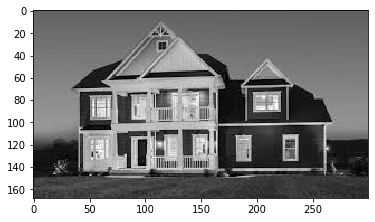

In [54]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

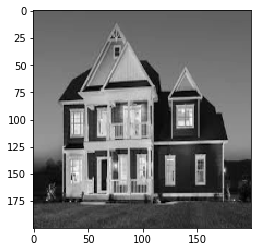

In [55]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [59]:
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_testing_data()

In [60]:
print(len(testing_data))

229
